In [42]:
from pathlib import Path

from matflow import load_workflow

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from matplotlib import gridspec
from PIL import Image
from matplotlib.pyplot import figure
import matplotlib
%matplotlib inline
import pandas as pd

In [49]:
#load_in_45x
#load_in_minus_45x
#load_in_x

stress_strain_data=pd.read_csv('stress_strain curve.csv')

In [50]:
stress_strain_data

,Strain +45 degrees,Stress (Mpa) +45 degrees,Strain -45 degrees,Stress (Mpa) -45 degrees,Strain x,Stress (Mpa) x
0,0.000000,1.400000e-11,0.000000,1.400000e-11,0.000000,1.400000e-11
1,0.000089,1.140000e+01,0.000088,1.200000e+01,0.000089,1.160000e+01
2,0.000179,2.280000e+01,0.000177,2.400000e+01,0.000177,2.320000e+01
3,0.000268,3.420000e+01,0.000265,3.600000e+01,0.000266,3.480000e+01
4,0.000358,4.570000e+01,0.000354,4.800000e+01,0.000354,4.640000e+01
5,0.000447,5.710000e+01,0.000442,5.990000e+01,0.000443,5.790000e+01
6,0.000536,6.850000e+01,0.000531,7.190000e+01,0.000532,6.960000e+01
7,0.000626,8.000000e+01,0.000619,8.400000e+01,0.000620,8.120000e+01
8,0.000715,9.140000e+01,0.000708,9.600000e+01,0.000709,9.280000e+01
9,0.000805,1.030000e+02,0.000796,1.080000e+02,0.000798,1.040000e+02


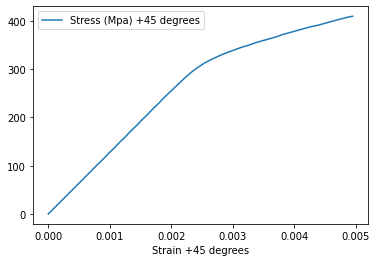

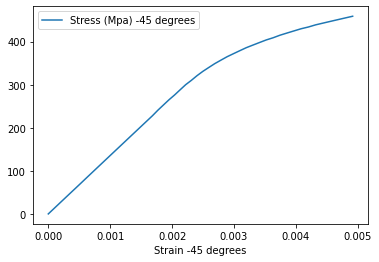

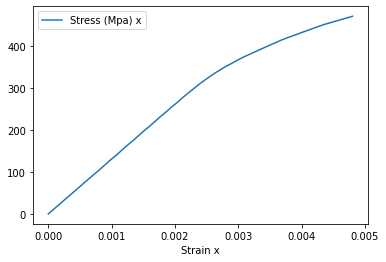

In [51]:
rotated_positive_45_degrees=stress_strain_data.plot(kind="line",x="Strain +45 degrees", y="Stress (Mpa) +45 degrees")
rotated_negative_45_degrees=stress_strain_data.plot(kind="line",x="Strain -45 degrees", y="Stress (Mpa) -45 degrees")
unrotated=stress_strain_data.plot(kind="line",x="Strain x", y="Stress (Mpa) x")

In [52]:
strain_p45 = stress_strain_data.iloc[:,0]
stress_p45 = stress_strain_data.iloc[:,1]
strain_n45 = stress_strain_data.iloc[:,2]
stress_n45 = stress_strain_data.iloc[:,3]
strain_x = stress_strain_data.iloc[:,4]
stress_x = stress_strain_data.iloc[:,5]

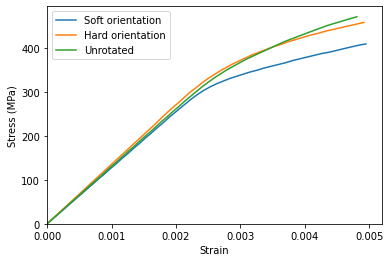

In [54]:
plt.figure()
#plt.plot(mean_strain[:, 0, 0], mean_stress[:, 0, 0]/1e6)
plt.plot(strain_p45, stress_p45, label = "Soft orientation")
plt.plot(strain_n45, stress_n45, label = "Hard orientation")
plt.plot(strain_x, stress_x, label = "Unrotated")

plt.legend()

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.xlim([0, None])
plt.ylim([0, None])

plt.savefig(r'stress_strain_curve.png')

In [43]:
shear_strain_data=pd.read_csv('shear means.csv')

In [44]:
shear_strain_data

,Index,Slip direction,Plane normal,Unrotated,Rotated +45 degrees,Rotated -45 degrees
0,B1,[2-1-10],(0001),5.080000e-04,1.520000e-02,1.570000e-02
1,B2,[-12-10],(0001),2.310000e-02,1.730000e-02,1.660000e-02
2,B3,[-1-120],(0001),3.900000e-02,7.150000e-03,3.530000e-02
3,Pris1,[2-1-10],(01-10),5.440000e-02,4.850000e-02,5.970000e-02
4,Pris2,[-12-10],(-1010),6.530000e-02,4.030000e-02,5.440000e-02
5,Pris3,[-1-120],(1-100),6.290000e-02,5.330000e-02,8.580000e-02
6,Pyr1,[2-1-10],(01-11),7.475000e-14,1.240000e-14,2.167000e-14
7,Pyr2,[-12-10],(-1011),1.766000e-15,4.581000e-14,6.254000e-14
8,Pyr3,[-1-120],(1-101),3.094000e-14,1.345000e-14,1.211000e-13
9,Pyr4,[11-20],(-1101),8.270000e-14,1.589000e-14,5.572000e-14


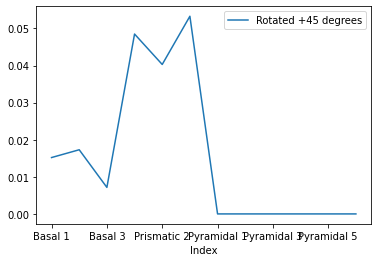

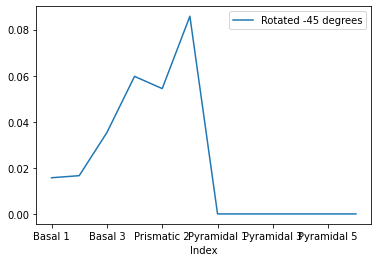

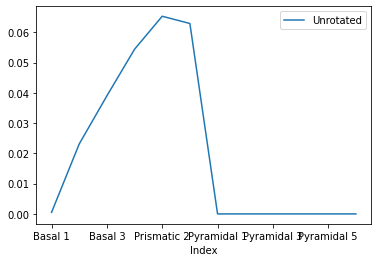

In [5]:
shear_rotated_positive_45_degrees=shear_strain_data.plot(kind="line",x="Index", y="Rotated +45 degrees")
shear_rotated_negative_45_degrees=shear_strain_data.plot(kind="line",x="Index", y="Rotated -45 degrees")
shear_unrotated=shear_strain_data.plot(kind="line",x="Index", y="Unrotated")


In [45]:
shear_p45 = shear_strain_data.iloc[:,4]
shear_n45 = shear_strain_data.iloc[:,5]
shear_x = shear_strain_data.iloc[:,3]
index = shear_strain_data.iloc[:,0]

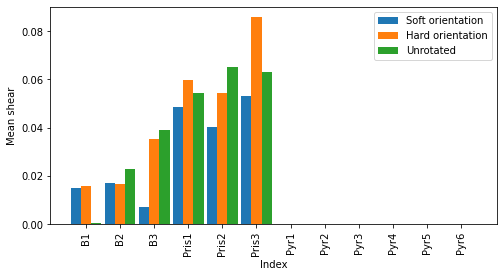

In [48]:
w = 0.3

bar1 = np.arange(len(index))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

figure(figsize=(8, 4))
plt.bar(bar1, shear_p45, width=width, label = "Soft orientation")
plt.bar(bar2, shear_n45, width=width, label = "Hard orientation")
plt.bar(bar3, shear_x, width=width, label = "Unrotated")
plt.xlabel('Index')
plt.ylabel('Mean shear')
plt.legend()
plt.xticks(bar1+w, index, rotation=90)

plt.savefig(r'shear_bar_plot',dpi=200)

In [29]:
plt.figure()
#plt.plot(mean_strain[:, 0, 0], mean_stress[:, 0, 0]/1e6)
plt.plot.bar(index, shear_p45, label = "Rotated positive 45 degrees")
plt.plot.bar(index, shear_n45, label = "Rotated negative 45 degrees")
plt.plot.bar(index, shear_x, label = "Unrotated")

plt.legend()

plt.xlabel('Index')
plt.ylabel('Shear')
plt.xlim([0, None])
plt.ylim([0, None])

#plt.savefig(r'stress_strain_curve.png')

AttributeError: 'function' object has no attribute 'bar'

<Figure size 432x288 with 0 Axes>